In [6]:
# load data set and check data information
import pandas as pd
import numpy as np
df = pd.read_csv('titanic.csv')
df.info()
df.duplicated()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Categorical columns : ['Name', 'Gender', 'Ticket', 'Cabin', 'Embarked']


In [8]:
# check the categorical and numerical columns
#categorical columns
cat_col = [col for col in df.columns if df[col].dtype == 'object']
print('Categorical columns :', cat_col)

Categorical columns : ['Name', 'Gender', 'Ticket', 'Cabin', 'Embarked']


In [12]:
# check  numerical columns
num_col = [col for col in df.columns if df[col].dtype != 'object']
print('Numerical columns :', num_col)

Numerical columns : ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [16]:
# Check total number of unique in values in categorical colums
df.nunique()
df[cat_col].nunique()

Name        891
Gender        2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

In [18]:
#removal of all above unwanted observations
df['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [22]:
df.to_csv('titanic_copy.csv')

In [28]:
# drop name and ticket
df1 = df.drop(['Name', 'Ticket'],axis=1)

In [38]:
df1.columns
df1.shape

(891, 10)

In [30]:
#Check Missing Values
round((df1.isnull().sum()/len(df1))*100,2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Gender          0.00
Age            19.87
SibSp           0.00
Parch           0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [42]:
df2 = df1.drop(columns='Cabin')
df2.dropna(subset=['Embarked'],axis=0, inplace=True)
df2.shape

(889, 9)

In [50]:
# Mean imputation(fill missing values with past observation)
df3 = df2.fillna(df2.Age.mean())
df3.shape
df3.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Gender         0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

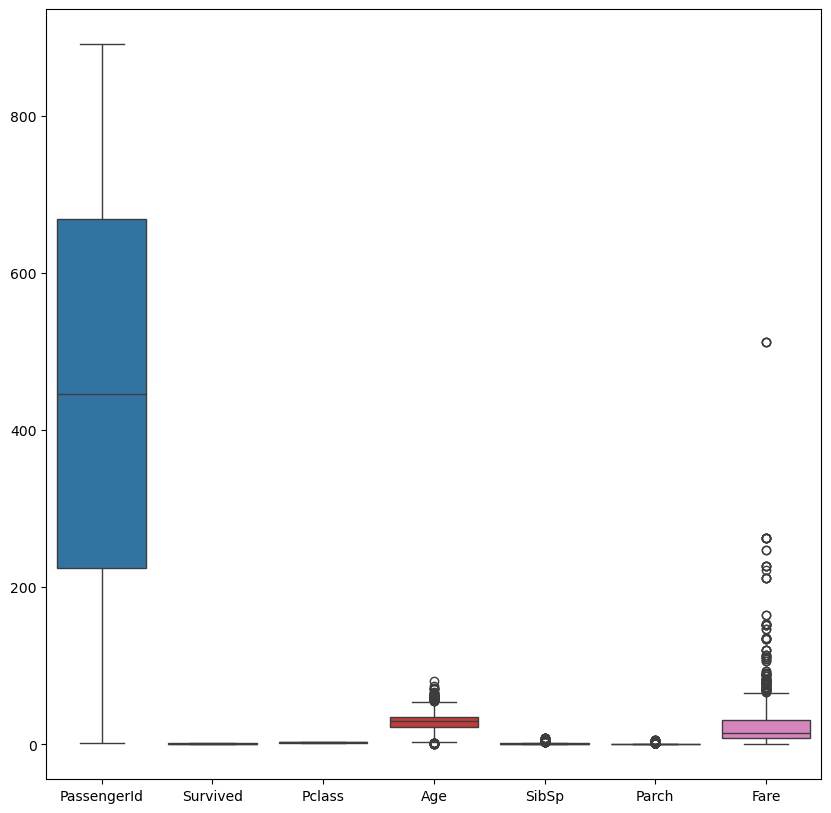

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.boxplot(data=df3)
plt.show()

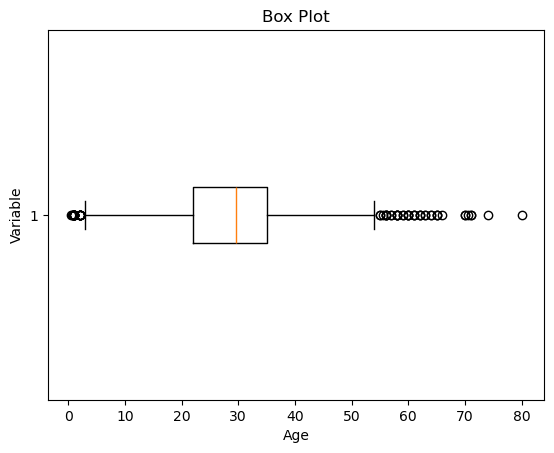

In [52]:
# outliers is check for numerical values only
import matplotlib.pyplot as plt
plt.boxplot(df3['Age'], vert=False)
plt.ylabel('Variable')
plt.xlabel('Age')
plt.title('Box Plot')
plt.show()

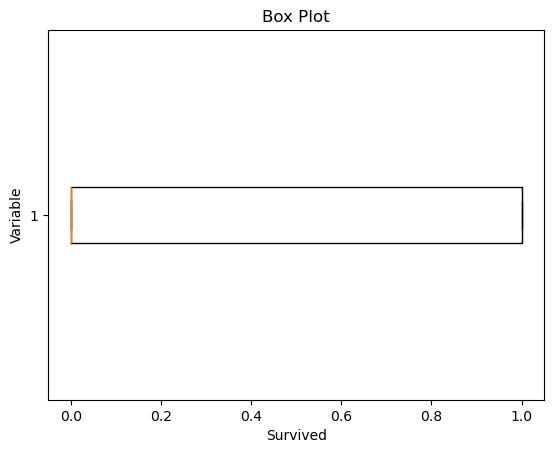

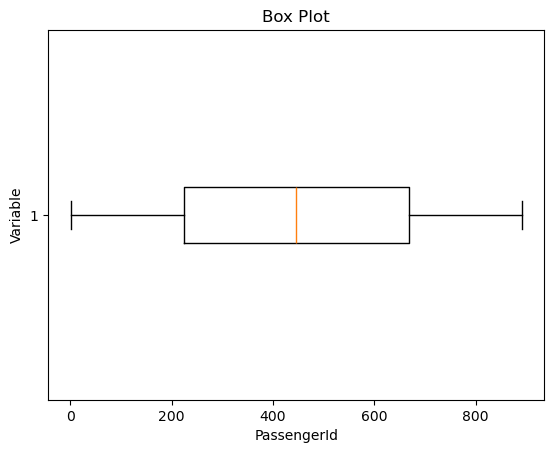

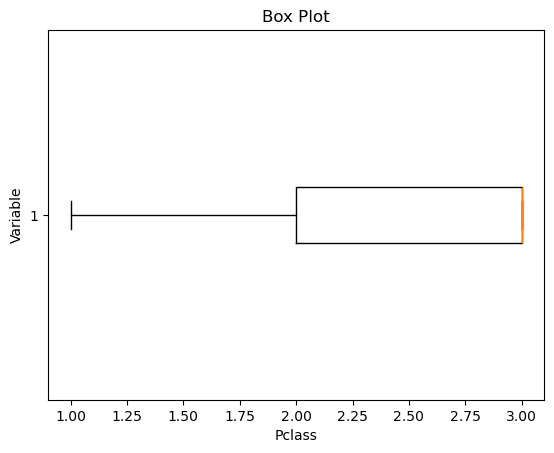

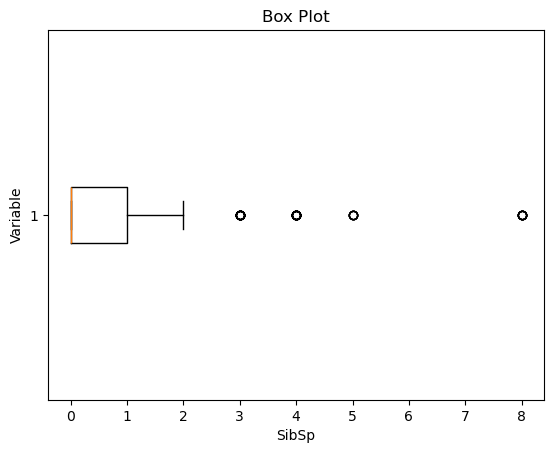

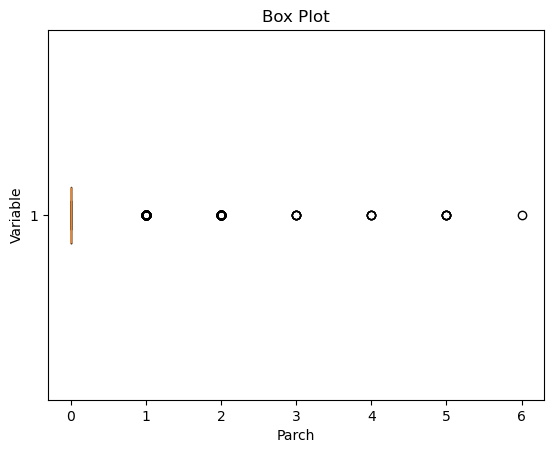

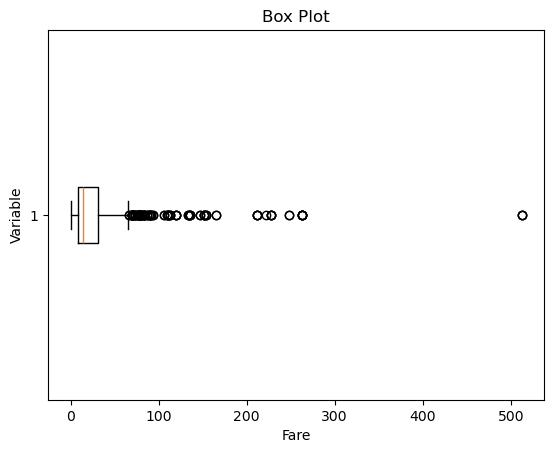

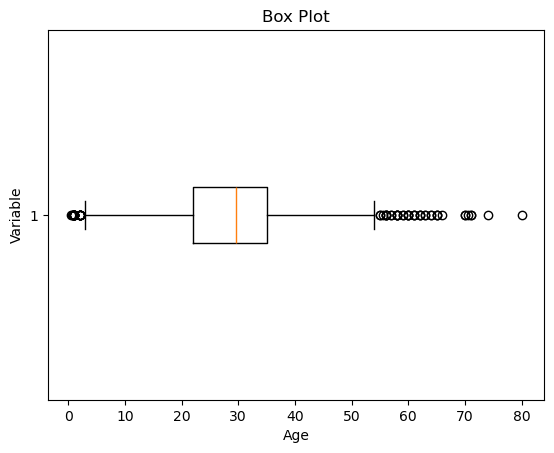

In [59]:
#using FOR LOOP TO PLOT BOX PLOT

#use box plot
import matplotlib.pyplot as plt

# Create a list of columns to plot
columns_to_plot = ['Survived', 'PassengerId', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Age']

# Iterate over the columns and create a separate box plot for each
for column in columns_to_plot:
    plt.boxplot(df3[column], vert=False)  # Access each column individually
    plt.ylabel('Variable')
    plt.xlabel(column)  # Set the x-axis label to the current column name
    plt.title('Box Plot')
    plt.show()

In [71]:
#calculate summary statistics
mean = df3['Age'].mean()
std = df3['Age'].std()
#calculate the lower and upper bounds
lower_bound = mean - std*3
upper_bound = mean + std*3
print('Lower bound :',lower_bound)
print('Upper bound :',upper_bound)
#drop outliers
df4 = df3[(df3['Age'] >= lower_bound)
              & (df3['Age'] <= upper_bound)]
print(df4)
df4.shape

Lower bound : -9.262946186426138
Upper bound : 68.54713157968457
     PassengerId  Survived  Pclass  Gender        Age  SibSp  Parch     Fare  \
0              1         0       3    male  22.000000      1      0   7.2500   
1              2         1       1  female  38.000000      1      0  71.2833   
2              3         1       3  female  26.000000      0      0   7.9250   
3              4         1       1  female  35.000000      1      0  53.1000   
4              5         0       3    male  35.000000      0      0   8.0500   
..           ...       ...     ...     ...        ...    ...    ...      ...   
886          887         0       2    male  27.000000      0      0  13.0000   
887          888         1       1  female  19.000000      0      0  30.0000   
888          889         0       3  female  29.642093      1      2  23.4500   
889          890         1       1    male  26.000000      0      0  30.0000   
890          891         0       3    male  32.000000  

(882, 9)

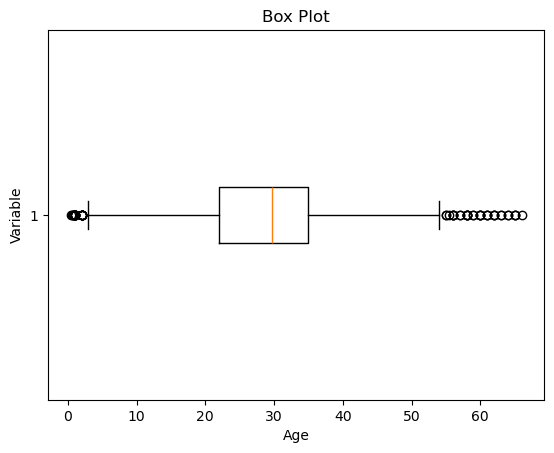

In [75]:
# outliers is check for numerical values only
import matplotlib.pyplot as plt
plt.boxplot(df4['Age'], vert=False)
plt.ylabel('Variable')
plt.xlabel('Age')
plt.title('Box Plot')
plt.show()

In [85]:
#calculate summary statistics
mean = df4['Age'].mean()
std = df4['Age'].std()
#calculate the lower and upper bounds
lower_bound = mean - std*3
upper_bound = mean + std*3
print('Lower bound :',lower_bound)
print('Upper bound :',upper_bound)
#drop outliers
df10 = df4[(df4['Age'] >= lower_bound)
              & (df4['Age'] <= upper_bound)]
print(df5)
df10.shape
df4.to_csv('titanicage_cleaned.csv')

Lower bound : -8.023949379755194
Upper bound : 66.63011810379912
     PassengerId  Survived  Pclass  Gender        Age  SibSp  Parch     Fare  \
0              1         0       3    male  22.000000      1      0   7.2500   
1              2         1       1  female  38.000000      1      0  71.2833   
2              3         1       3  female  26.000000      0      0   7.9250   
3              4         1       1  female  35.000000      1      0  53.1000   
4              5         0       3    male  35.000000      0      0   8.0500   
..           ...       ...     ...     ...        ...    ...    ...      ...   
886          887         0       2    male  27.000000      0      0  13.0000   
887          888         1       1  female  19.000000      0      0  30.0000   
888          889         0       3  female  29.642093      1      2  23.4500   
889          890         1       1    male  26.000000      0      0  30.0000   
890          891         0       3    male  32.000000  

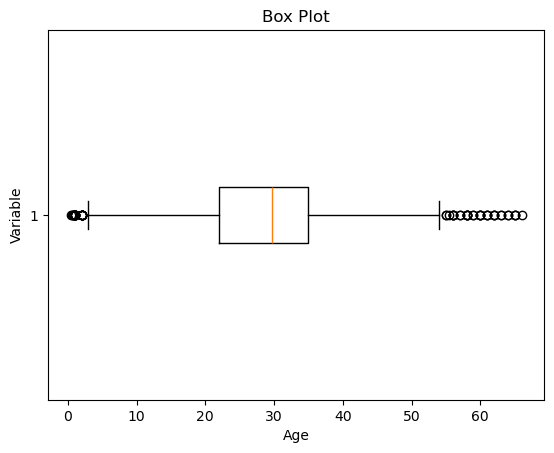

In [79]:
# outliers is check for numerical values only
import matplotlib.pyplot as plt
plt.boxplot(df10['Age'], vert=False)
plt.ylabel('Variable')
plt.xlabel('Age')
plt.title('Box Plot')
plt.show()

In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('titanicage_cleaned.csv')

# Replace gender and embarked values in a single line
df.replace({'gender': {'male': 1, 'female': 2}, 'embarked': {'s': 1, 'c': 2, 'q': 3}}, inplace=True)

# Save the updated DataFrame to a new CSV file
df.to_csv('titanicage_cleaned.csv', index=False)

print(df.head())
df.to_csv('titanicage_cleaned.csv')

In [103]:
# load data set and check data information
import pandas as pd
import numpy as np
df5 = pd.read_csv('titanicage_cleaned.csv')


In [126]:
#this is for data transformation to numerical the gender and embark columns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
X=df5.drop(['Survived'],axis=1) #or 
# data validation and verification
#x = df5[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
Y = df5['Survived']
#num_col_ = [col for col in X.columns if X[col].dtype != 'object']
num_col_ = X.columns
X1 = X
X1[num_col_] = scaler.fit_transform(X1[num_col_])
X1.head

<bound method NDFrame.head of      Unnamed: 0  PassengerId  Pclass  Gender       Age  SibSp     Parch  \
0      0.000000     0.000000     1.0     0.0  0.329064  0.125  0.000000   
1      0.001124     0.001124     0.0     1.0  0.573041  0.125  0.000000   
2      0.002247     0.002247     1.0     1.0  0.390058  0.000  0.000000   
3      0.003371     0.003371     0.0     1.0  0.527295  0.125  0.000000   
4      0.004494     0.004494     1.0     0.0  0.527295  0.000  0.000000   
..          ...          ...     ...     ...       ...    ...       ...   
877    0.995506     0.995506     0.5     0.0  0.405306  0.000  0.000000   
878    0.996629     0.996629     0.0     1.0  0.283318  0.000  0.000000   
879    0.997753     0.997753     1.0     1.0  0.445595  0.125  0.333333   
880    0.998876     0.998876     0.0     0.0  0.390058  0.000  0.000000   
881    1.000000     1.000000     1.0     0.0  0.481549  0.000  0.000000   

         Fare  Embarked  
0    0.014151       0.0  
1    0.139136    